In [40]:
import pandas as pd

AI_job1 = pd.read_csv("ai_job_market_insights.csv")
AI_job2 = pd.read_csv("My_Data.csv")

AI_job2.rename(columns={"Job titiles": "Job_Title"}, inplace = True)

In [41]:
AI_job1["Job_Title"] = AI_job1["Job_Title"].str.lower().str.strip()
AI_job2["Job_Title"] = AI_job2["Job_Title"].str.lower().str.strip()

In [42]:
AI_merged = pd.merge(AI_job1, AI_job2, on="Job_Title", how="inner")
print(AI_merged.head())

              Job_Title       Industry Company_Size       Location  \
0  marketing specialist     Technology        Large      Singapore   
1         sales manager         Retail        Small         Berlin   
2           ux designer      Education        Large  San Francisco   
3            hr manager        Finance       Medium      Singapore   
4         sales manager  Entertainment       Medium      Singapore   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High           Marketing   93792.562466   
1               Low            High  Project Management   93027.953758   
2            Medium          Medium       Cybersecurity  102825.007867   
3               Low            High               Sales  102065.720673   
4              High             Low       Cybersecurity   96834.578295   

  Remote_Friendly Job_Growth_Projection AI Impact  Tasks  AI models  \
0              No               Decline       20%    281       

In [43]:
AI_merged.to_csv("merged_ai.csv", index=False)

Limpieza de los 3 Datasets

In [44]:
#Creamos esta función, para hacer ajustes generales a todos los datasets
def limpieza_dataset(df):
    df.columns = df.columns.str.replace("_", " ")

    if "Salary USD" in df.columns:
        df["Salary USD"] = df["Salary USD"].round(2)

    if "Job Title" in df.columns:
        df["Job Title"] = df["Job Title"].str.title()

    if 'AI Workload Ratio' in df.columns:
        df['AI Workload Ratio'] = pd.to_numeric(df['AI Workload Ratio'], errors='coerce')

    if "AI Impact" in df.columns:
        df["AI Impact"] = df["AI Impact"].str.replace("%", "", regex=False)
        df['AI Impact'] = df['AI Impact'].astype(str).astype(float)

limpieza_dataset(AI_job1)
limpieza_dataset(AI_job2)
limpieza_dataset(AI_merged)

In [45]:
AI_merged.head(1)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.12884,Leadership & Strategy


Comienza el análisis

In [46]:
#Vamos a utilizar tanto los dos datasets de partida,
#como el data set resultante de su unión para obtener análisis interesantes de este tema.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

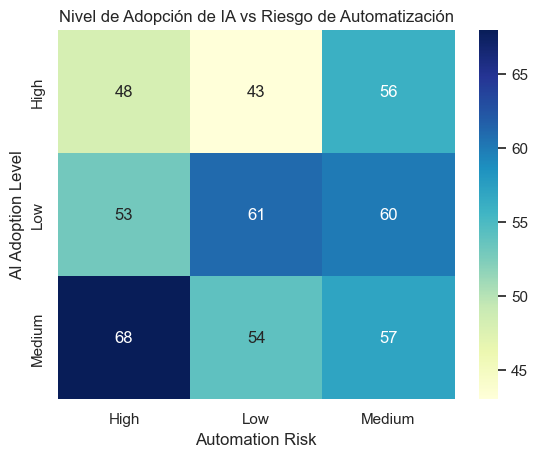

In [48]:
#Relacion entre el nivel de adopción de la IA y el risgo de automatización
pivot_ai_risk = pd.crosstab(AI_job1['AI Adoption Level'], AI_job1['Automation Risk'])
sns.heatmap(pivot_ai_risk, annot=True, cmap="YlGnBu")
plt.title("Nivel de Adopción de IA vs Riesgo de Automatización")
plt.show()


C:\Users\34722\AppData\Local\Temp\ipykernel_22696\3935649892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="viridis")


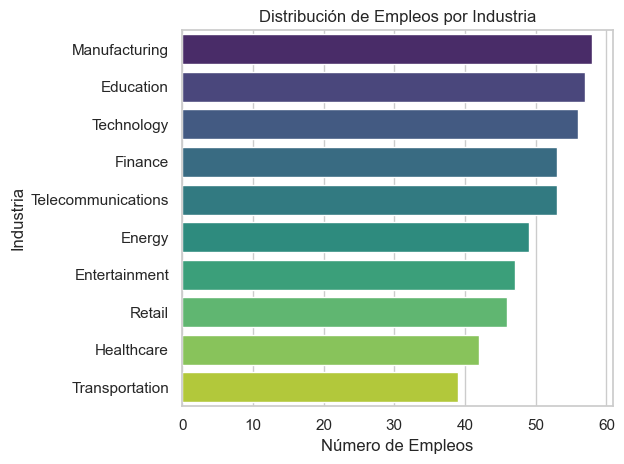

In [49]:
#Distribución de empleos por industria
industry_counts = AI_job1['Industry'].value_counts()
plt.figure()
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="viridis")
plt.title("Distribución de Empleos por Industria")
plt.xlabel("Número de Empleos")
plt.ylabel("Industria")
plt.tight_layout()
plt.show()

In [75]:
AI_job1.head(1)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.17,Yes,Growth


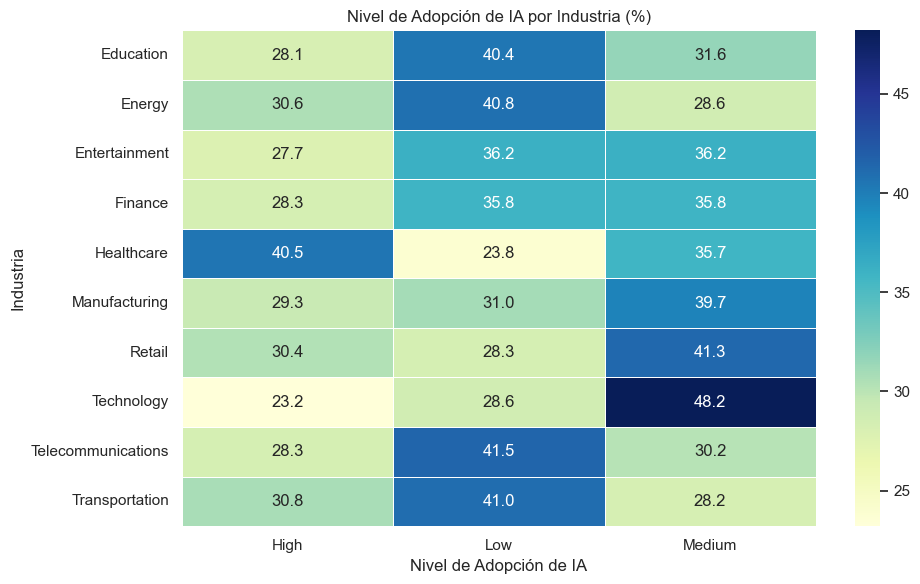

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear tabla de frecuencia cruzada entre Industry y AI_Adoption_Level
industry_adoption = pd.crosstab(AI_job1["Industry"], AI_job1["AI Adoption Level"], normalize='index') * 100
industry_adoption = industry_adoption.round(1)

# Crear gráfico de calor
plt.figure(figsize=(10, 6))
sns.heatmap(industry_adoption, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Nivel de Adopción de IA por Industria (%)")
plt.xlabel("Nivel de Adopción de IA")
plt.ylabel("Industria")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_22696\1956014356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills, x="Count", y="Skill", palette="flare")


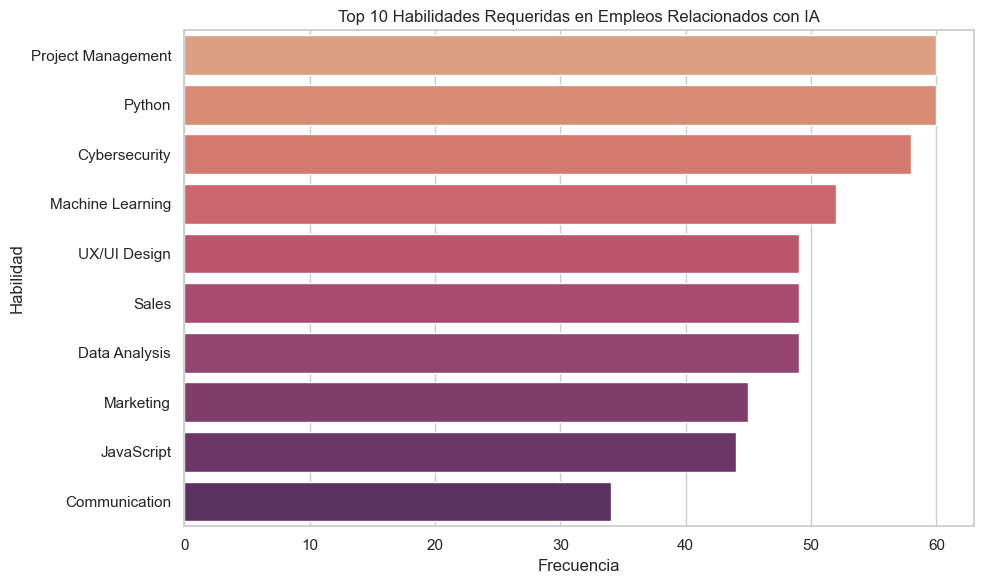

In [ ]:
# Contar las 10 habilidades más frecuentes que solicitan las empresas
top_skills = AI_job1["Required Skills"].value_counts().head(10).reset_index()
top_skills.columns = ["Skill", "Count"]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_skills, x="Count", y="Skill", palette="flare")
plt.title("Top 10 Habilidades Requeridas en Empleos Relacionados con IA")
plt.xlabel("Frecuencia")
plt.ylabel("Habilidad")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_22696\2323019481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AI_job1, x="AI Adoption Level", y="Salary USD", palette="Set2")


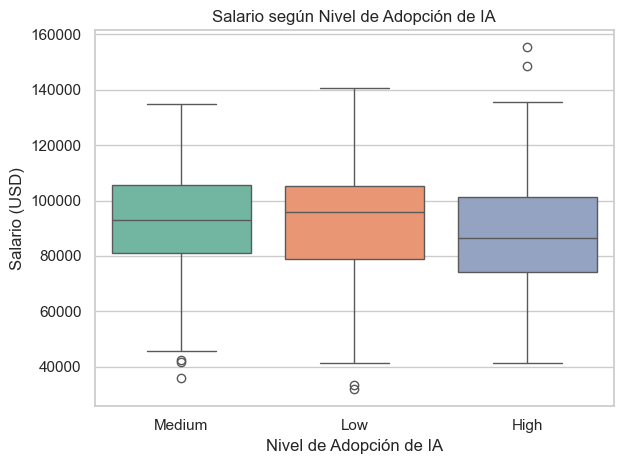

In [50]:
#Compararción de sueldos segun la adopcion de la IA
plt.figure()
sns.boxplot(data=AI_job1, x="AI Adoption Level", y="Salary USD", palette="Set2")
plt.title("Salario según Nivel de Adopción de IA")
plt.xlabel("Nivel de Adopción de IA")
plt.ylabel("Salario (USD)")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_22696\2763577606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AI_job1, x="Remote Friendly", y="Salary USD", palette="Set1")


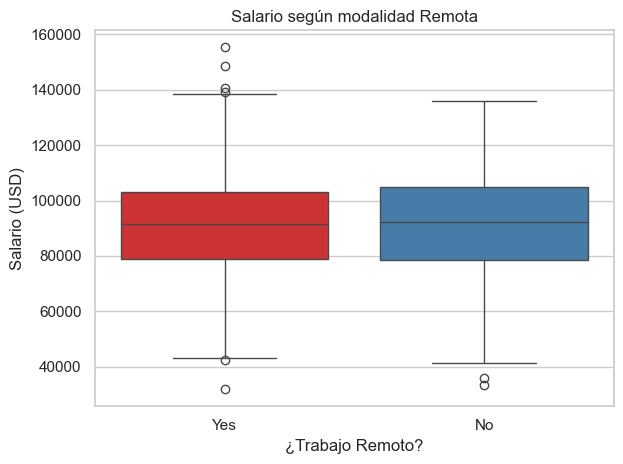

In [52]:
#Influencia del trabajo remoto en el salario
plt.figure()
sns.boxplot(data=AI_job1, x="Remote Friendly", y="Salary USD", palette="Set1")
plt.title("Salario según modalidad Remota")
plt.xlabel("¿Trabajo Remoto?")
plt.ylabel("Salario (USD)")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

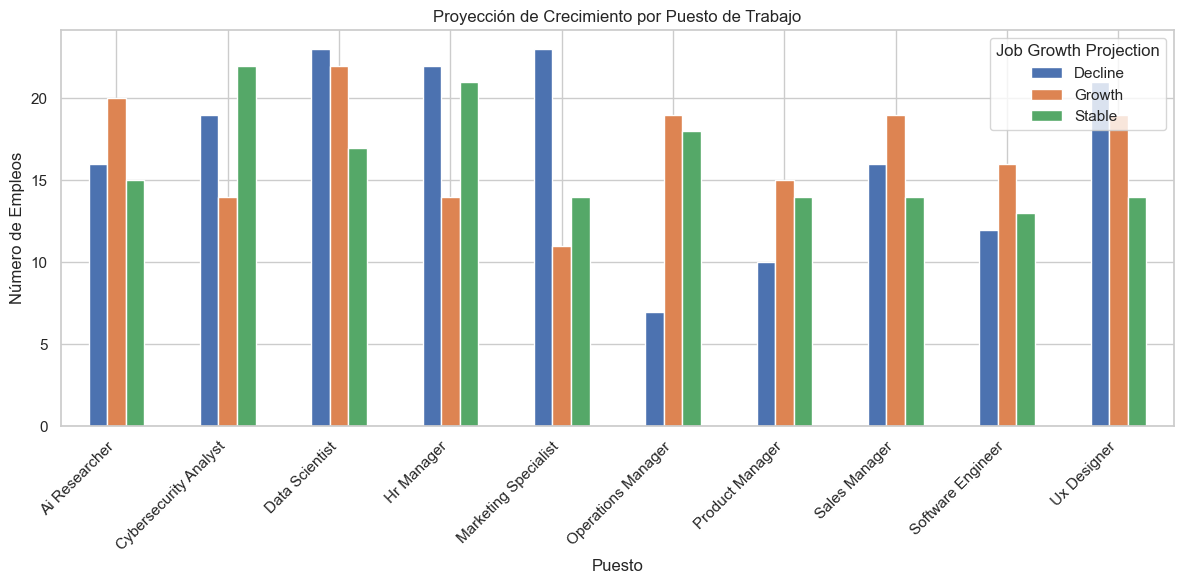

In [53]:
#Proyección de crecimiento laboral segun el puesto
growth_projection = pd.crosstab(AI_job1["Job Title"], AI_job1["Job Growth Projection"])
plt.figure()
growth_projection.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title("Proyección de Crecimiento por Puesto de Trabajo")
plt.xlabel("Puesto")
plt.ylabel("Número de Empleos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
#Pasamos a analizar el otro dataset, también por separardo

In [55]:
#Valores unicos de domain
unique_domains = AI_job2['Domain'].unique()

print("Dominios únicos en el dataset:")
for domain in unique_domains:
    print("-", domain)


Dominios únicos en el dataset:
- Communication & PR
- Data & IT
- Administrative & Clerical
- Leadership & Strategy
- Medical & Healthcare
- Supply Chain & Logistics
- Law Enforcement
- Construction
- Sales & Marketing
- Hospitality


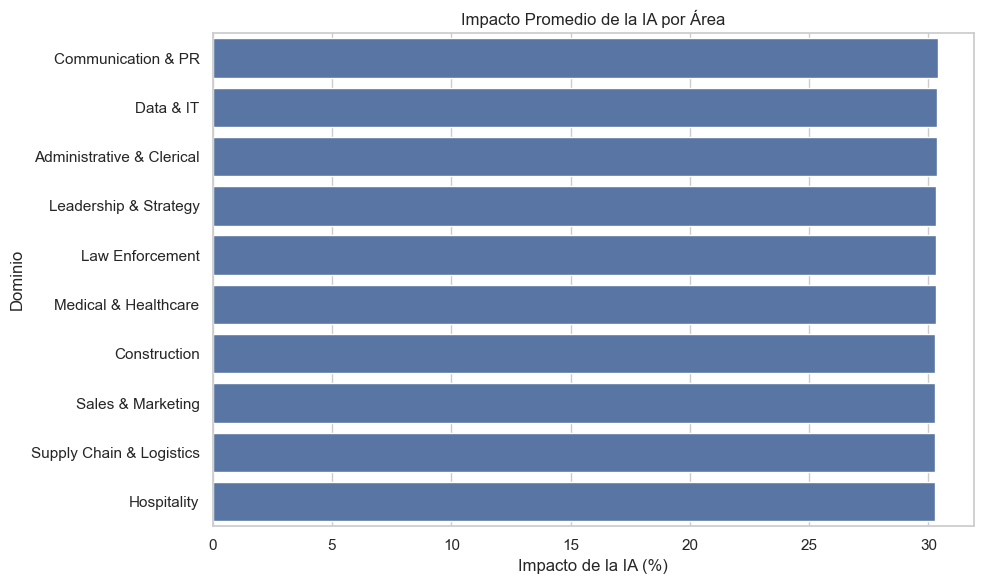

In [56]:
domain_ai_impact = AI_job2.groupby("Domain")["AI Impact"].mean().sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=domain_ai_impact.values, y=domain_ai_impact.index)
plt.title("Impacto Promedio de la IA por Área")
plt.xlabel("Impacto de la IA (%)")
plt.ylabel("Dominio")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_22696\2802819501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=AI_job2, x='AI Impact', y='Domain', palette="Set1")


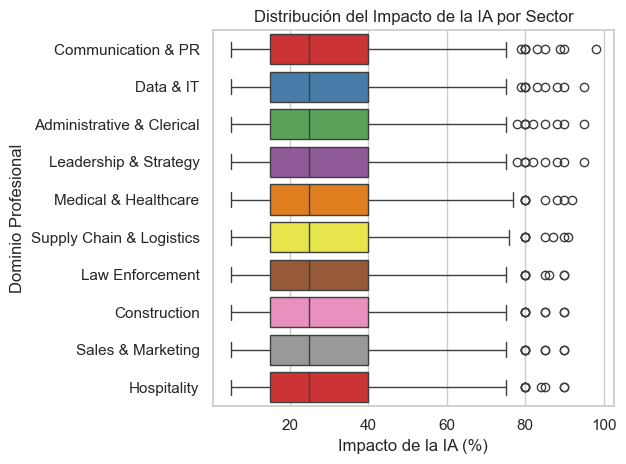

In [57]:
#Impacto de la IA por sector
plt.figure()
sns.boxplot(data=AI_job2, x='AI Impact', y='Domain', palette="Set1")
plt.title("Distribución del Impacto de la IA por Sector")
plt.xlabel("Impacto de la IA (%)")
plt.ylabel("Dominio Profesional")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_22696\3354273606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_proportions.values, y=domain_proportions.index, palette="viridis")


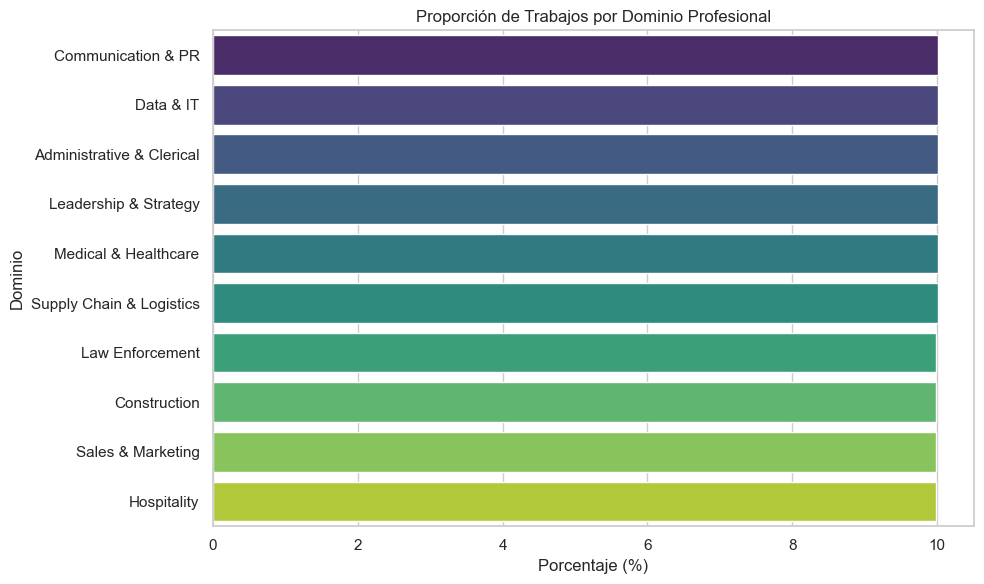

In [58]:
#Proporción de trabajos por ambito laboral
domain_proportions = AI_job2['Domain'].value_counts(normalize=True).sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=domain_proportions.values, y=domain_proportions.index, palette="viridis")
plt.title("Proporción de Trabajos por Dominio Profesional")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Dominio")
plt.tight_layout()
plt.show()

In [59]:
#Pasamos al análisis del dataset en el que se mezclan los dos datasts de origen
#Pero antes vamos a crear unas columnas adicionales que nos ayuden a generar un análisis mas completo

In [60]:
#Combinamos el sector laboral con el riesgo de automatización
AI_merged['Tipo Empresa Riesgo'] = AI_merged['Industry'] + '-' + AI_merged['Automation Risk']
AI_merged.head(1)


,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain,Tipo Empresa Riesgo
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.12884,Leadership & Strategy,Technology-High


In [61]:
#Realcionamos el nivel de adopcion de la IA segun la localización

In [62]:
AI_merged['Region IA'] = AI_merged['Location'] + '-' + AI_merged['AI Adoption Level']
AI_merged.head(1)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain,Tipo Empresa Riesgo,Region IA
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.12884,Leadership & Strategy,Technology-High,Singapore-Medium


In [63]:
#Empezamos el análisis

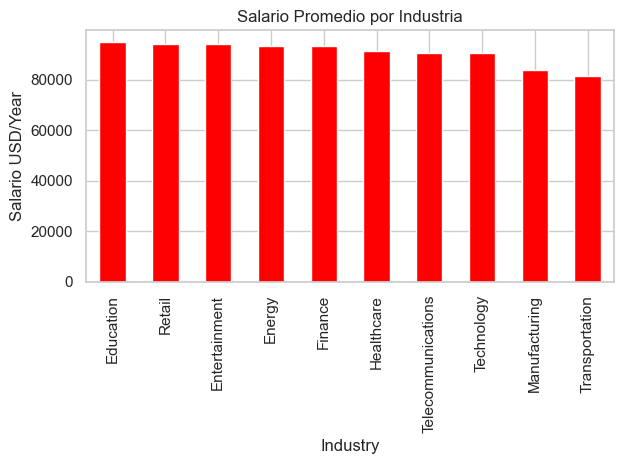

In [64]:
#Salario promedio por industria
industry_group = AI_merged.groupby("Industry")[["Salary USD", "AI Workload Ratio"]].mean().sort_values(by="Salary USD", ascending=False)

# Gráfico: Salario promedio
industry_group[["Salary USD"]].plot(kind='bar', color="red", legend=False)
plt.title("Salario Promedio por Industria")
plt.ylabel("Salario USD/Year")
plt.tight_layout()
plt.show()

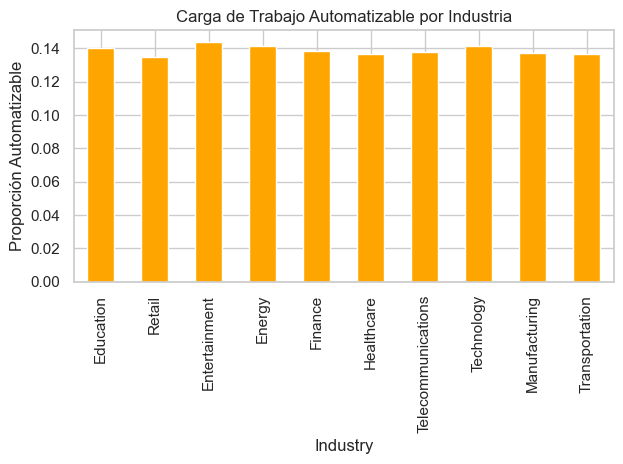

In [65]:
#Carga de trabajo automatizable por industria
industry_group[["AI Workload Ratio"]].plot(kind='bar', color='orange', legend=False)
plt.title("Carga de Trabajo Automatizable por Industria")
plt.ylabel("Proporción Automatizable")
plt.tight_layout()
plt.show()


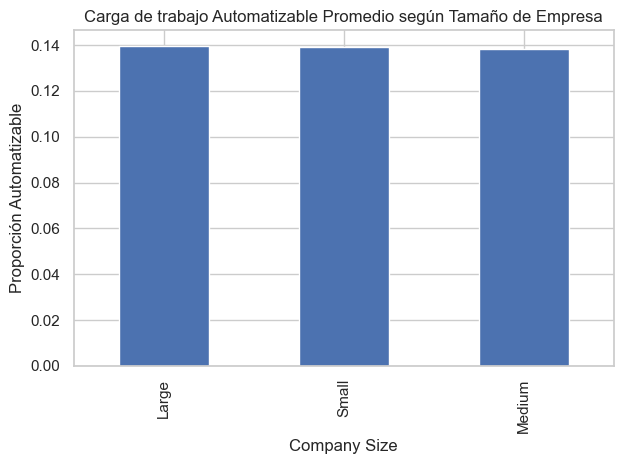

In [66]:
company_group = AI_merged.groupby("Company Size").agg({
    "Tasks": "mean",
    "AI models": "mean",
    "AI Workload Ratio": "mean",
    "Salary USD": "mean"
}).sort_values(by="AI Workload Ratio", ascending=False)

company_group[["AI Workload Ratio"]].plot(kind='bar', legend=False)
plt.title("Carga de trabajo Automatizable Promedio según Tamaño de Empresa")
plt.ylabel("Proporción Automatizable")
plt.tight_layout()
plt.show()

In [67]:
#Aqui vemos que está muy equilibrado el gráfico,
#y que afecta por igual a todos los tamaños de empresa el impacto de la IA

In [68]:
#Vamos a intentar crear alguna columna a partir de la api de adzuna
#ID = aeb4aaf3
#Key= 146fd9ef43c92e7b8726c7c6ca501bd5

In [71]:
import requests
import time
import numpy as np

APP_ID = "aeb4aaf3"
APP_KEY = "146fd9ef43c92e7b8726c7c6ca501bd5"

# === FUNCIÓN PARA CONSULTAR OFERTAS ===
def obtener_ofertas_adzuna(job_title, location=""):
    url = "https://api.adzuna.com/v1/api/jobs/us/search/1"
    params = {
        "app_id": APP_ID,
        "app_key": APP_KEY,
        "what": job_title,
        "results_per_page": 1,
        "content-type": "application/json"
    }
    if location:
        params["where"] = location

    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            return data.get("count", 0)
        else:
            print(f"❌ Error en '{job_title}': {response.status_code}")
            return None
    except Exception as e:
        print(f"❌ Fallo con '{job_title}': {e}")
        return None

# === USAR LA COLUMNA CORRECTA DEL DATAFRAME ===
unique_jobs = AI_merged['Job Title'].unique()[:10]  # Puedes quitar [:10] si quieres recorrer todos
oferta_dict = {}

print("🔍 Consultando API de Adzuna...")

for job in unique_jobs:
    print(f"→ Consultando: {job}")
    oferta_dict[job] = obtener_ofertas_adzuna(job)
    time.sleep(1)  # Recomendado para evitar bloqueo por exceso de peticiones

# === ASIGNAR LOS RESULTADOS AL DATAFRAME ===
AI_merged["Available Job Offers"] = AI_merged["Job Title"].map(oferta_dict)


🔍 Consultando API de Adzuna...
→ Consultando: Marketing Specialist
❌ Error en 'Marketing Specialist': 429
→ Consultando: Sales Manager
❌ Error en 'Sales Manager': 429
→ Consultando: Ux Designer
❌ Error en 'Ux Designer': 429
→ Consultando: Hr Manager
❌ Error en 'Hr Manager': 429
→ Consultando: Product Manager
❌ Error en 'Product Manager': 429
→ Consultando: Software Engineer
❌ Error en 'Software Engineer': 429
→ Consultando: Data Scientist
❌ Error en 'Data Scientist': 429
→ Consultando: Operations Manager
❌ Error en 'Operations Manager': 429


In [72]:
AI_merged.head(12)

,Job Title,Industry,Company Size,Location,AI Adoption Level,Automation Risk,Required Skills,Salary USD,Remote Friendly,Job Growth Projection,AI Impact,Tasks,AI models,AI Workload Ratio,Domain,Tipo Empresa Riesgo,Region IA,Available Job Offers
0,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56,No,Decline,20.0,281,2181,0.128840,Leadership & Strategy,Technology-High,Singapore-Medium,None
1,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95,No,Growth,23.0,293,1997,0.146720,Hospitality,Retail-High,Berlin-Low,None
2,Ux Designer,Education,Large,San Francisco,Medium,Medium,Cybersecurity,102825.01,No,Growth,50.0,129,993,0.129909,Communication & PR,Education-Medium,San Francisco-Medium,None
3,Hr Manager,Finance,Medium,Singapore,Low,High,Sales,102065.72,Yes,Growth,20.0,299,1960,0.152551,Leadership & Strategy,Finance-High,Singapore-Low,None
4,Sales Manager,Entertainment,Medium,Singapore,High,Low,Cybersecurity,96834.58,Yes,Decline,23.0,293,1997,0.146720,Hospitality,Entertainment-Low,Singapore-High,None
5,Marketing Specialist,Finance,Small,London,High,High,Python,91566.97,Yes,Growth,20.0,281,2181,0.128840,Leadership & Strategy,Finance-High,London-High,None
6,Hr Manager,Retail,Small,Paris,Low,High,Cybersecurity,98209.52,Yes,Decline,20.0,299,1960,0.152551,Leadership & Strategy,Retail-High,Paris-Low,None
7,Product Manager,Finance,Medium,Singapore,High,High,JavaScript,101001.90,Yes,Growth,60.0,195,1732,0.112587,Supply Chain & Logistics,Finance-High,Singapore-High,None
8,Sales Manager,Telecommunications,Small,Dubai,High,Low,UX/UI Design,82799.36,No,Growth,23.0,293,1997,0.146720,Hospitality,Telecommunications-Low,Dubai-High,None
9,Software Engineer,Manufacturing,Medium,Singapore,High,Medium,Machine Learning,78401.26,No,Decline,60.0,133,1342,0.099106,Communication & PR,Manufacturing-Medium,Singapore-High,None


In [ ]:
#obtenemos los 10 trabajos mas demandados
top_demanded_jobs = (
    AI_merged.groupby("Available Job Offers")[""]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Crear gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_demanded_jobs, x="Available Job Offers", y="Job titiles", palette="mako")
plt.title("Top 10 Trabajos con Más Ofertas Disponibles")
plt.xlabel("Ofertas de Trabajo Disponibles")
plt.ylabel("Título del Trabajo")
plt.tight_layout()
plt.show()

C:\Users\34722\AppData\Local\Temp\ipykernel_22696\1091652319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_jobs["Salary USD"] = pd.to_numeric(remote_jobs["Salary USD"], errors='coerce')
C:\Users\34722\AppData\Local\Temp\ipykernel_22696\1091652319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_remote_jobs, x="Salary USD", y="Job Title", palette="rocket")


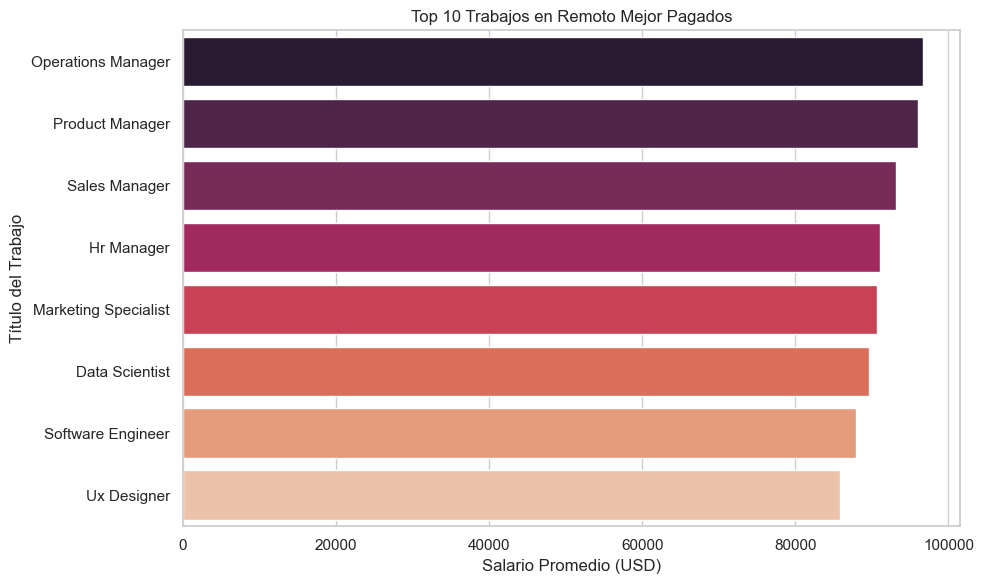

In [ ]:
#Trabajos en remoto mejor pagados

remote_jobs = AI_merged[AI_merged["Remote Friendly"] == "Yes"]

# Asegurar que Salary_USD es numérico
remote_jobs["Salary USD"] = pd.to_numeric(remote_jobs["Salary USD"], errors='coerce')

# Obtener los 10 trabajos en remoto mejor pagados
top_remote_jobs = (
    remote_jobs.groupby("Job Title")["Salary USD"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Crear gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_remote_jobs, x="Salary USD", y="Job Title", palette="rocket")
plt.title("Top 10 Trabajos en Remoto Mejor Pagados")
plt.xlabel("Salario Promedio (USD)")
plt.ylabel("Título del Trabajo")
plt.tight_layout()
plt.show()